<p style="color:blue; font-size:40px; text-align:center"> Web Scraping </p>

The purpose of this *interactive essay* is to __scrape text__ from an online source and conduct linguisitc analysis employing __NLTK__. The website selected for this analysis is the US news section from <a href="https://www.foxnews.com/us" target="_blank">Fox News</a>.

In [121]:
import requests
page = requests.get("https://www.foxnews.com/us")

The content of this page can be displayed be the following code:

In [13]:
#print(page.content)

However, the output of this code is not displayed in an easily readable format. This can be improved by means of the __Beautiful Soup library__.

In [123]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

In [127]:
#print(soup.prettify())

This formatting is easier to interpret for a human eye. In order to further improve the clarity of the output, paragraphs can be identified.

In [128]:
paras = soup.find_all('p')
print(paras)

[<p class="copyright">
      This material may not be published, broadcast, rewritten,
      or redistributed. ©2022 FOX News Network, LLC. All rights reserved.
      Quotes displayed in real-time or delayed by at least 15 minutes. Market data provided by <a href="https://www.factset.com/">Factset</a>. Powered and implemented by <a href="https://www.factset.com/solutions/business-needs/digital-solutions">FactSet Digital Solutions</a>. <a href="https://www.factset.com/privacy">Legal Statement</a>. Mutual Fund and ETF data provided by <a href="https://lipperalpha.refinitiv.com/">Refinitiv Lipper</a>.
    </p>, <p class="dek"><a href="/us/chicago-states-attorney-kim-foxx-allegedly-slapped-husband">Cook County State’s Attorney Kim Foxx's husband alleged that she slapped him during an alleged domestic dispute on June 4 at around 10 p.m.</a></p>, <p class="dek"><a href="/us/ethan-limings-family-seeks-answers-beating-17-year-old-absolute-nightmare">Ethan Liming's family is begging for answers

These paragraphs can be further cut down so as to represent only the textual content.
Morever, paragraphs composed solely of whitespace characters or single numbers are also deleted. This has been achieved by the following code:

In [129]:
only_text = []
for para in paras:
    processed_para = para.get_text()
    processed_para = processed_para.strip()
    if len(processed_para) > 1:
        only_text.append(processed_para)
print(only_text)

['This material may not be published, broadcast, rewritten,\n      or redistributed. ©2022 FOX News Network, LLC. All rights reserved.\n      Quotes displayed in real-time or delayed by at least 15 minutes. Market data provided by Factset. Powered and implemented by FactSet Digital Solutions. Legal Statement. Mutual Fund and ETF data provided by Refinitiv Lipper.', "Cook County State’s Attorney Kim Foxx's husband alleged that she slapped him during an alleged domestic dispute on June 4 at around 10 p.m.", "Ethan Liming's family is begging for answers in the brutal beating death of the 17-year-old high school junior following an altercation involving a water bead gun.", "The Austin Police Department on Friday warned of a new crime trend called 'jugging' in which suspects follow victims after they visit financial institutions.", "Fox News Flash top headlines are here. Check out what's clicking on Foxnews.com.", 'A Missouri man killed his son and daughter and is now receiving medical trea

After having created a list with the meaningful content of the paragraphs, it is now possible to conduct linguistic analysis. <br>
By means of __NLTK__ the text can be tokenized and __tagged for part of speech__.


In [133]:
import nltk

tuples = []
for sentence in only_text:
    tokenized = nltk.word_tokenize(sentence)
    tagged = nltk.pos_tag(tokenized)
    for item in tagged:
        tuples.append(item)
        
print(tuples)

[('This', 'DT'), ('material', 'NN'), ('may', 'MD'), ('not', 'RB'), ('be', 'VB'), ('published', 'VBN'), (',', ','), ('broadcast', 'NN'), (',', ','), ('rewritten', 'VB'), (',', ','), ('or', 'CC'), ('redistributed', 'VBN'), ('.', '.'), ('©2022', 'JJ'), ('FOX', 'NNP'), ('News', 'NNP'), ('Network', 'NNP'), (',', ','), ('LLC', 'NNP'), ('.', '.'), ('All', 'NNP'), ('rights', 'NNS'), ('reserved', 'VBN'), ('.', '.'), ('Quotes', 'VBZ'), ('displayed', 'VBN'), ('in', 'IN'), ('real-time', 'NN'), ('or', 'CC'), ('delayed', 'VBN'), ('by', 'IN'), ('at', 'IN'), ('least', 'JJS'), ('15', 'CD'), ('minutes', 'NNS'), ('.', '.'), ('Market', 'NNP'), ('data', 'NNS'), ('provided', 'VBN'), ('by', 'IN'), ('Factset', 'NNP'), ('.', '.'), ('Powered', 'NNP'), ('and', 'CC'), ('implemented', 'VBN'), ('by', 'IN'), ('FactSet', 'NNP'), ('Digital', 'NNP'), ('Solutions', 'NNP'), ('.', '.'), ('Legal', 'NNP'), ('Statement', 'NNP'), ('.', '.'), ('Mutual', 'NNP'), ('Fund', 'NNP'), ('and', 'CC'), ('ETF', 'NNP'), ('data', 'NNS'), (

This output allows for **statystical analysis** of parts of speech. 

In [134]:
counter_dict = {}
for item in tuples:
    if item[1] not in counter_dict:
        counter_dict[item[1]] = 1
    else:
        counter_dict[item[1]] += 1

print(counter_dict)

{'DT': 75, 'NN': 133, 'MD': 3, 'RB': 17, 'VB': 9, 'VBN': 44, ',': 33, 'CC': 21, '.': 44, 'JJ': 42, 'NNP': 154, 'NNS': 37, 'VBZ': 16, 'IN': 107, 'JJS': 2, 'CD': 16, 'VBD': 38, 'POS': 5, 'PRP': 10, 'VBG': 25, "''": 3, 'WDT': 1, 'VBP': 13, 'RP': 3, 'WP': 7, 'PRP$': 9, 'TO': 12, 'NNPS': 1, 'WRB': 2, '``': 1, 'PDT': 1, 'RBS': 1}


The labels for parts of speech can be explained in the following way:
* __DT__ - Determiner
* __NN__ - Singular noun
* __MD__ - Modal
* __RB__ - Adverb
* __VB__ - Verb, base form
* __VBN__ - Verb, past participle
* __CC__ - Coordinating conjunction
* __JJ__ - Adjective
* __NNP__ - Singular proper noun
* __NNS__ - Plural noun
* __VBZ__ - Verb, 3rd person singular
* __IN__ - Preposition/Subordinating conjunction
* __JJS__ - Adjective, superlative
* __CD__ - Cardinal digit
* __VBD__ - Verb, past tense
* __POS__ - Possessive ending
* __PRP__ - Personal pronoun
* __VBG__ - Verb, gerund/present participle
* __WDT__ - Wh-determiner
* __VBP__ - Verb, singular, present
* __RP__ - Participle
* __WP__ - Wh-pronoun
* __PRP$__ - Possesive pronoun
* __TO__ - to go 'to' school
* __NNPS__ - Proper noun, plural
* __WRB__ - Who-adverb
* __PDT__ - Predeterminer
* __RBS__ - Adverb, superlative


Another step in the analysis is the visualization of the collected data by means of the __matplotlib__ package. 

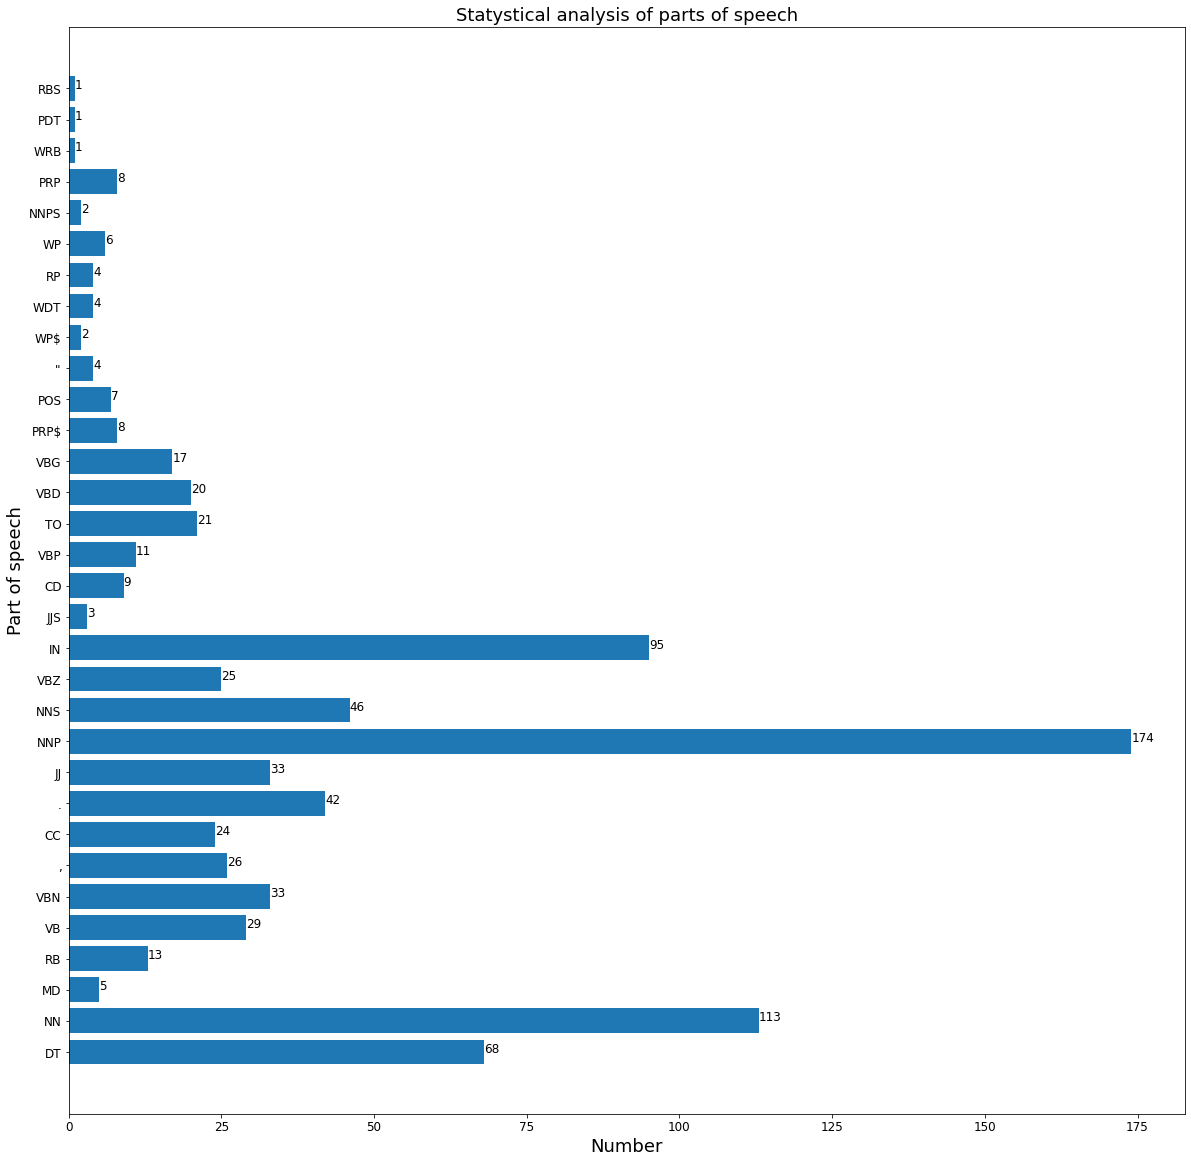

In [142]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,20)

counter_dict = {'DT': 68, 'NN': 113, 'MD': 5, 'RB': 13, 'VB': 29, 'VBN': 33, ',': 26, 'CC': 24, '.': 42, 'JJ': 33, 'NNP': 174, 'NNS': 46, 'VBZ': 25, 'IN': 95, 'JJS': 3, 'CD': 9, 
                'VBP': 11, 'TO': 21, 'VBD': 20, 'VBG': 17, 'PRP$': 8, 'POS': 7, "''": 4, 'WP$': 2, 'WDT': 4, 'RP': 4, 'WP': 6, 'NNPS': 2, 'PRP': 8, 'WRB': 1, 'PDT': 1, 'RBS': 1}
dict_keys = list(counter_dict.keys())
dict_values = list(counter_dict.values())

plt.barh(dict_keys, dict_values)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title('Statystical analysis of parts of speech', size=18)
plt.xlabel('Number', size=18)
plt.ylabel('Part of speech', size=18)
for i, v in enumerate(dict_values):
    plt.text(v, i, str(v), size=12)
plt.show()


This graph allows us to notice that singular proper nouns occur most frequently. They are followed by singular nouns and prepositions.

Seeing as proper nouns occur 174 times, the next step in the analysis is to identify named entities. 

In [172]:
for sentence in only_text:
    tokenized = nltk.word_tokenize(sentence)
    tagged = nltk.pos_tag(tokenized)
    print(nltk.ne_chunk(tagged))

(S
  This/DT
  material/NN
  may/MD
  not/RB
  be/VB
  published/VBN
  ,/,
  broadcast/NN
  ,/,
  rewritten/VB
  ,/,
  or/CC
  redistributed/VBN
  ./.
  ©2022/JJ
  (ORGANIZATION FOX/NNP News/NNP Network/NNP)
  ,/,
  (ORGANIZATION LLC/NNP)
  ./.
  All/NNP
  rights/NNS
  reserved/VBN
  ./.
  Quotes/VBZ
  displayed/VBN
  in/IN
  real-time/NN
  or/CC
  delayed/VBN
  by/IN
  at/IN
  least/JJS
  15/CD
  minutes/NNS
  ./.
  (PERSON Market/NNP)
  data/NNS
  provided/VBN
  by/IN
  (PERSON Factset/NNP)
  ./.
  (PERSON Powered/NNP)
  and/CC
  implemented/VBN
  by/IN
  (ORGANIZATION FactSet/NNP)
  (ORGANIZATION Digital/NNP Solutions/NNP)
  ./.
  (PERSON Legal/NNP Statement/NNP)
  ./.
  (PERSON Mutual/NNP Fund/NNP)
  and/CC
  (ORGANIZATION ETF/NNP)
  data/NNS
  provided/VBN
  by/IN
  (PERSON Refinitiv/NNP Lipper/NNP)
  ./.)
(S
  (PERSON Cook/NNP)
  (ORGANIZATION County/NNP)
  State/NNP
  ’/NNP
  s/VBD
  Attorney/NNP
  (PERSON Kim/NNP Foxx/NNP)
  's/POS
  husband/NN
  alleged/VBD
  that/IN
  she/PRP

In this output, we can point out that words such as *Martha* or *Cameron* have been labeled as __PERSON__. Expressions such as *Fox News* have been marked as __ORGANIZATION__. Words labelled as __GPE__ (geopolitical entity), such as *Florida* or *Tennessee* have also been recognized. 

Deeper analysis in this essay will be conducted by choosing specific parts of speech to focus on, namely - __adjectives__. In order to read through the adjectives used in the text, they have to be compiled in a list.

In [175]:
adjectives = []
for item in tuples:
    if item[1] == 'JJ':
        adjectives.append(item)
print(adjectives)   

[('©2022', 'JJ'), ('domestic', 'JJ'), ('brutal', 'JJ'), ('17-year-old', 'JJ'), ('high', 'JJ'), ('new', 'JJ'), ('financial', 'JJ'), ('top', 'JJ'), ('medical', 'JJ'), ('local', 'JJ'), ('suicide', 'JJ'), ('unidentified', 'JJ'), ('dead', 'JJ'), ('wrong', 'JJ'), ('gender-affirming', 'JJ'), ('former', 'JJ'), ('special', 'JJ'), ('15-year-old', 'JJ'), ('dead', 'JJ'), ('injured', 'JJ'), ('wrong', 'JJ'), ('Spider-Man', 'JJ'), ('new', 'JJ'), ('domestic', 'JJ'), ('shot', 'JJ'), ('black', 'JJ'), ('next', 'JJ'), ('toxic', 'JJ'), ('1-year-old', 'JJ'), ('federal', 'JJ'), ('suspicious', 'JJ'), ('brutal', 'JJ'), ('17-year-old', 'JJ'), ('high', 'JJ'), ('elderly', 'JJ'), ('dead', 'JJ'), ('former', 'JJ'), ('first-degree', 'JJ'), ('wrong', 'JJ'), ('powerful', 'JJ'), ('first', 'JJ'), ('©2022', 'JJ')]


By means of the WordNet function, one can identify the **name of the synset**, the **definition**, as well as the **hyperonyms and hyponyms** of the adjectives that are of interest in the analysis. To exemplify those functions, the word *liberal* has been selected.

In [192]:
syn = wordnet.synsets('liberal')[0]
print(syn.name())
print(syn.definition())

liberal.n.01
a person who favors a political philosophy of progress and reform and the protection of civil liberties


In [194]:
print(syn.hypernyms())
print(syn.hypernyms()[0].hyponyms())

[Synset('adult.n.01')]
[Synset('brachycephalic.n.01'), Synset('caregiver.n.02'), Synset('catch.n.03'), Synset('centrist.n.01'), Synset('character.n.05'), Synset('conservative.n.01'), Synset('dolichocephalic.n.01'), Synset('elder.n.01'), Synset('ex-spouse.n.01'), Synset('host.n.01'), Synset('important_person.n.01'), Synset('jack_of_all_trades.n.01'), Synset('liberal.n.01'), Synset('liberal.n.02'), Synset('man.n.01'), Synset('militarist.n.01'), Synset('oldster.n.01'), Synset('pacifist.n.01'), Synset('patrician.n.01'), Synset('pledgee.n.01'), Synset('pledger.n.01'), Synset('professional.n.01'), Synset('sobersides.n.01'), Synset('sophisticate.n.01'), Synset('stay-at-home.n.01'), Synset('stoic.n.02'), Synset('thoroughbred.n.01'), Synset('woman.n.01')]


In [195]:
print(syn.root_hypernyms())

[Synset('entity.n.01')]


Moreover, it is possible to distinguish the hypernym path of the chosen word. For instance, in the previous code it has been established that *adult* is the direct hypernym of *liberal*, while *entity* is its root hypernym. However, it can also be noticed that *person* is the hypernym of *adult*, *casual agent* is the hypernym of *person*, *physicial entity* is the hypernym of *casual agent* and *entity* is the hypernym of *physical entity*.

In [196]:
print(syn.hypernym_paths())

[[Synset('entity.n.01'), Synset('physical_entity.n.01'), Synset('causal_agent.n.01'), Synset('person.n.01'), Synset('adult.n.01'), Synset('liberal.n.01')], [Synset('entity.n.01'), Synset('physical_entity.n.01'), Synset('object.n.01'), Synset('whole.n.02'), Synset('living_thing.n.01'), Synset('organism.n.01'), Synset('person.n.01'), Synset('adult.n.01'), Synset('liberal.n.01')]]


Further analysis can be conducted by investigating the __synonyms__ of the chosen word.

In [112]:
lemmas = syn.lemmas()
synonyms = []
for syn in wordnet.synsets('liberal'):
    for lemma in syn.lemmas():
        synonyms.append(lemma.name())
print(*synonyms)

liberal liberalist progressive liberal broad large-minded liberal tolerant liberal liberal big bighearted bounteous bountiful freehanded handsome giving liberal openhanded free loose liberal


It is interesting to see that words such as *handsome* or *bounitful* are amongst the synonyms of the word *liberal*.

To conclude, the __Natural Language Toolkit__ offers a wide range of tools to analyse text. The said text, can be obtained in the process of web scraping conducted with the __Beautiful Soup__ library.